<a href="https://colab.research.google.com/github/ShivaAtom/AI-Practices/blob/main/DogsAndCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras

In [ ]:
data, info=tfds.load('cats_vs_dogs',split=['train'],as_supervised=True ,with_info=True)
ds_data = data[0]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete1UNH79/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


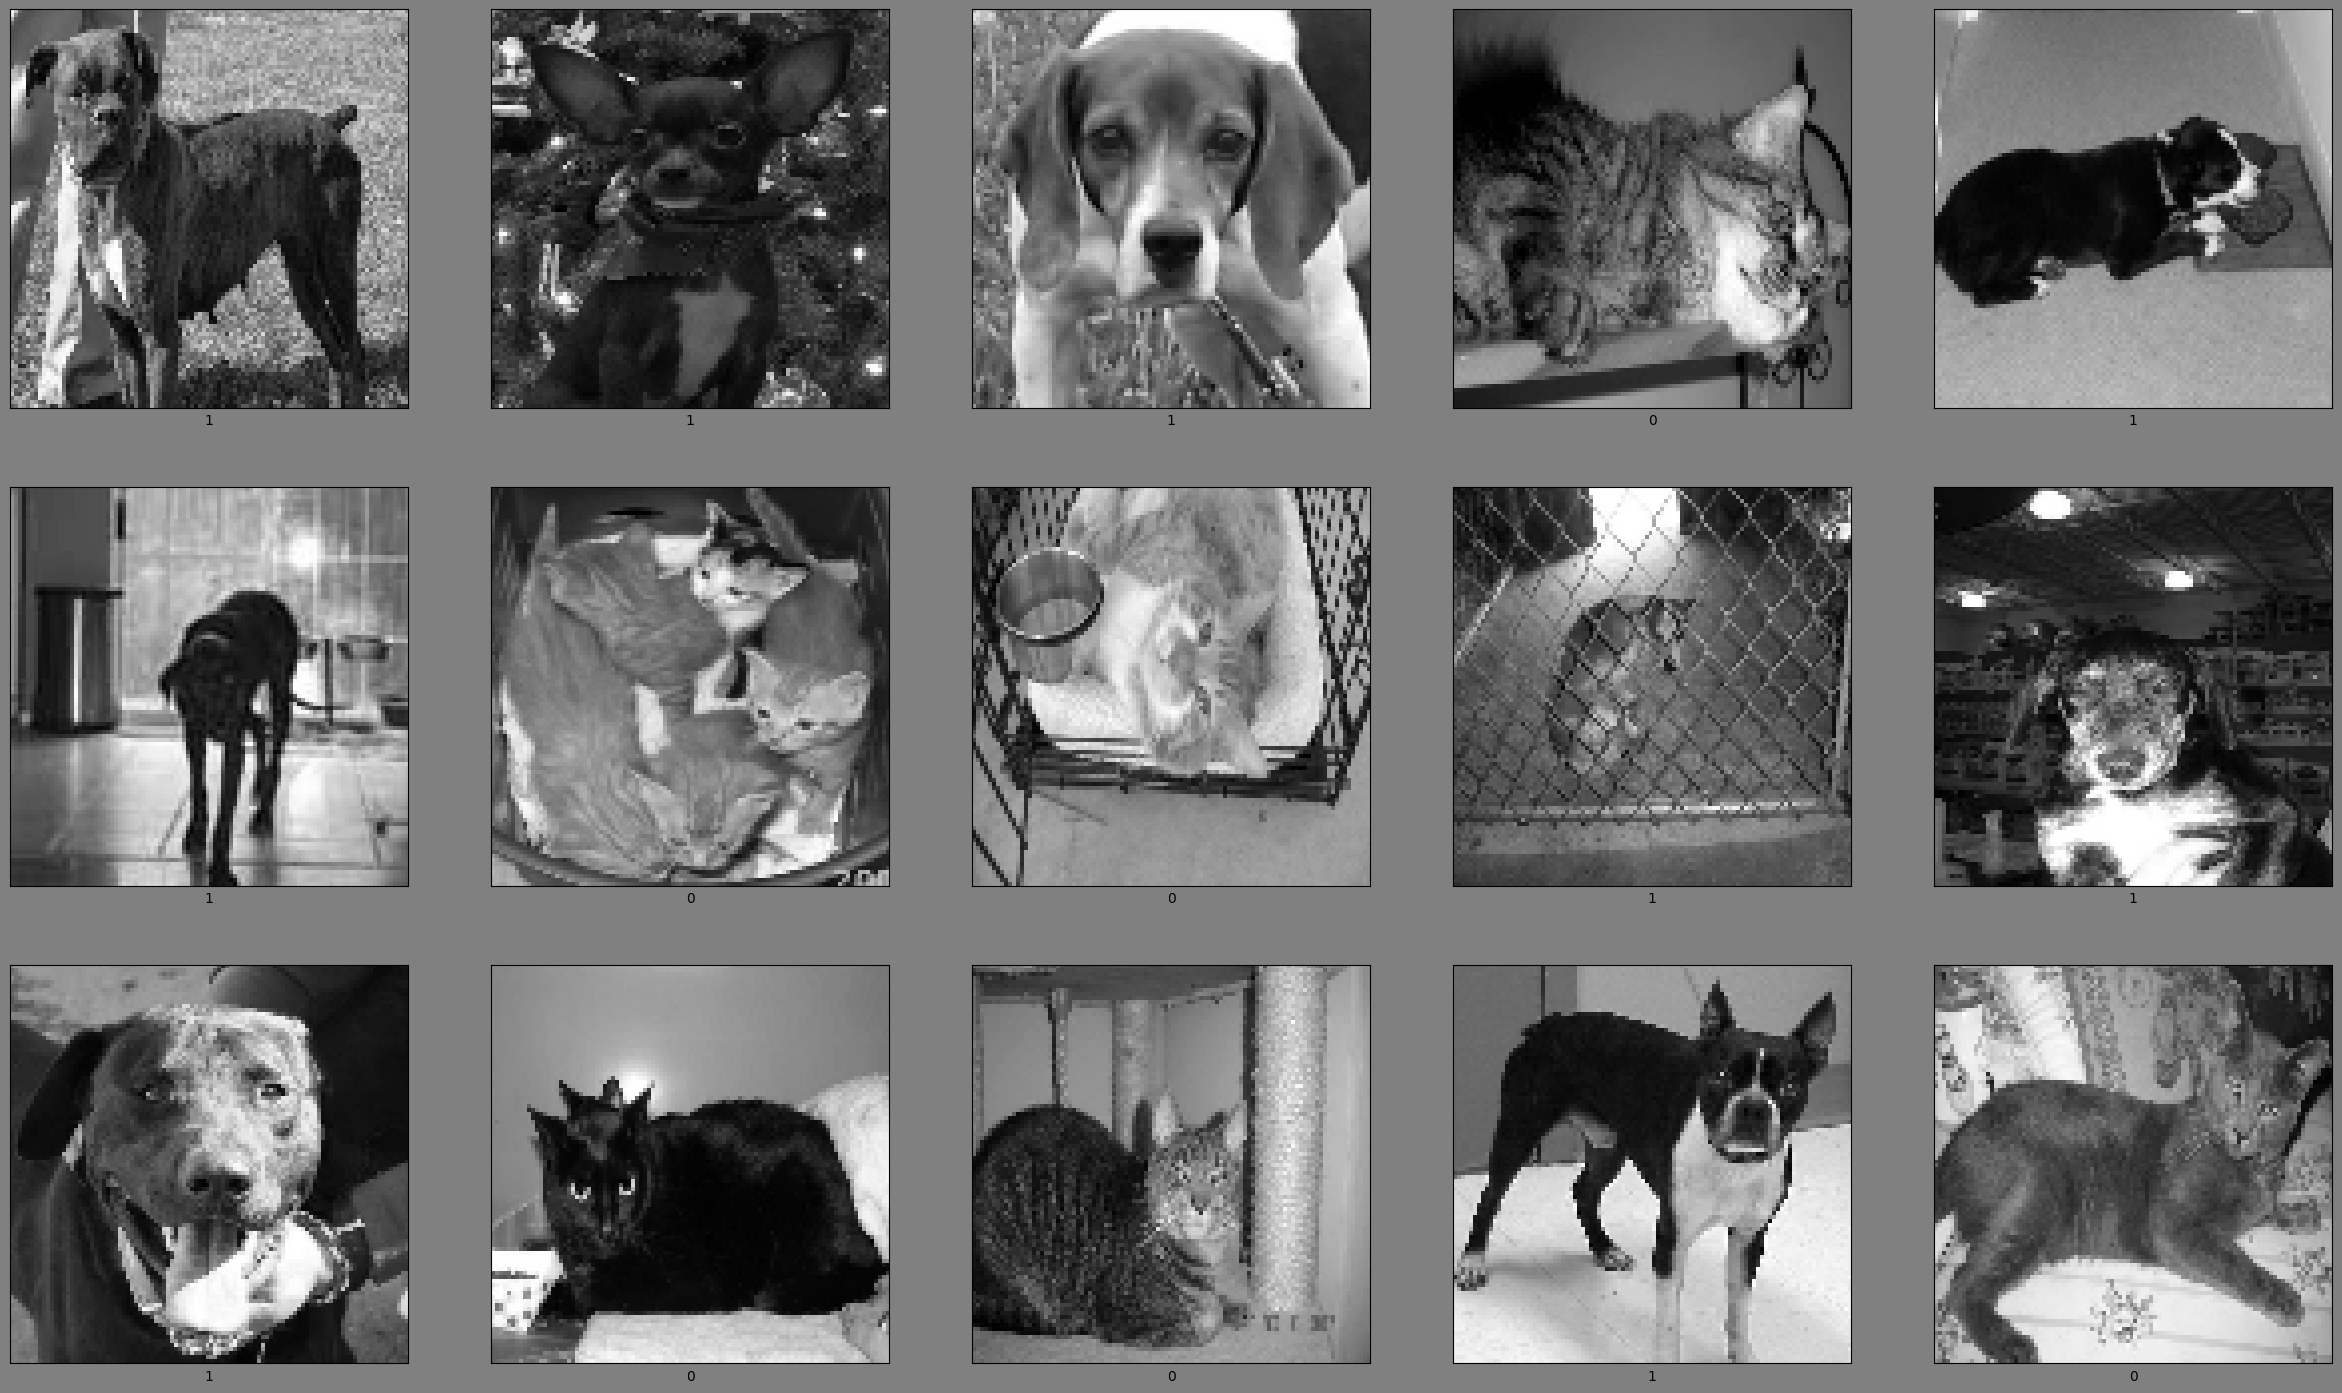

In [ ]:
plt.figure(figsize=(30,30), facecolor='gray')
for id,(image,label)in enumerate(ds_data.take(15)):
  plt.subplot(5,5,id+1)
  image = cv2.cvtColor(image.numpy(),cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(100,100))
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"{label}")
  plt.imshow(image, cmap='gray')

In [ ]:
img_train, lab_train = [],[]
for id, (image, label) in enumerate(ds_data):
  image = cv2.cvtColor(image.numpy(),cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(100,100))
  img_train.append(image)
  lab_train.append(label)
img_train = np.array(img_train).astype(np.float32)/255
lab_train = np.array(lab_train)

In [ ]:
modelo = keras.Sequential([
    keras.layers.Input(shape=(100,100,1)),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [ ]:
modelo.compile(
    optimizer='adam',
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy]
)

In [ ]:
print('Comenzando entrenamiento')
his = modelo.fit(img_train,lab_train,epochs=15)
print('modelo entrenado')

Comenzando entrenamiento
Epoch 1/15
727/727 [==============================] - 9s 9ms/step - loss: 0.6453 - binary_accuracy: 0.6143
Epoch 2/15
727/727 [==============================] - 7s 9ms/step - loss: 0.5095 - binary_accuracy: 0.7515
Epoch 3/15
727/727 [==============================] - 6s 9ms/step - loss: 0.4357 - binary_accuracy: 0.7995
Epoch 4/15
727/727 [==============================] - 7s 9ms/step - loss: 0.3798 - binary_accuracy: 0.8288
Epoch 5/15
727/727 [==============================] - 6s 9ms/step - loss: 0.3389 - binary_accuracy: 0.8512
Epoch 6/15
727/727 [==============================] - 7s 9ms/step - loss: 0.3114 - binary_accuracy: 0.8630
Epoch 7/15
727/727 [==============================] - 6s 8ms/step - loss: 0.2805 - binary_accuracy: 0.8801
Epoch 8/15
727/727 [==============================] - 6s 9ms/step - loss: 0.2611 - binary_accuracy: 0.8878
Epoch 9/15
727/727 [==============================] - 6s 8ms/step - loss: 0.2319 - binary_accuracy: 0.9010
Epoch 10/15


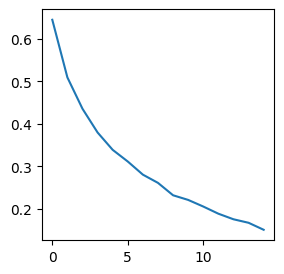

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(his.history['loss'])

In [ ]:
etiqueta =['gato','perro']
img_test = np.array(img_train[10:22])
pre = modelo.predict(img_train[10:22])

1/1 [==============================] - 0s 19ms/step


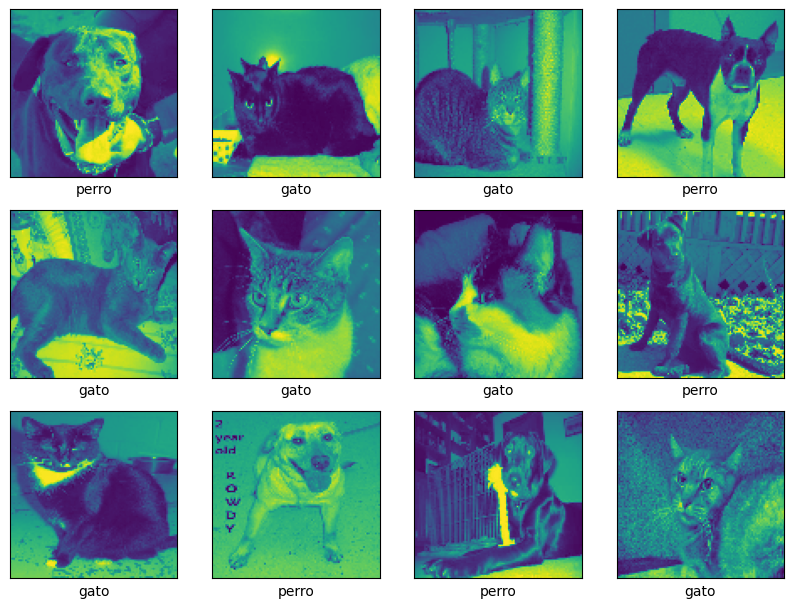

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  if(pre[i] <= 0.5):
    plt.xlabel(f'{etiqueta[0]}')
  else:
    plt.xlabel(f'{etiqueta[1]}')
  plt.imshow(img_test[i])